## IMPORTING LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load dataset

In [ ]:

email_data = pd.read_csv('/content/Spam Email Detection - spam.csv')

In [ ]:

email_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
email_data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
email_data.shape

(5572, 5)

Cleaning data

In [ ]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
email_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)



In [ ]:
email_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
email_data.rename(columns={'v1':'Category','v2':'Message'},inplace=True)
email_data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

email_data['Category'] = encoder.fit_transform(email_data['Category'])

In [ ]:
email_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
# remove duplicates
email_data = email_data.drop_duplicates(keep='first')
email_data.duplicated().sum()

0

In [ ]:
email_data.shape

(5163, 2)

## Exploratory Data Analysis

In [ ]:


# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(email_data.head())


First few rows of the dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
# Check for missing values
print("\nChecking for missing values:")
print(email_data.isnull().sum())



Checking for missing values:
Category    0
Message     0
dtype: int64


In [ ]:
# Basic statistics
print("\nBasic statistics of the dataset:")
print(email_data.describe())


Basic statistics of the dataset:
          Category
count  5163.000000
mean      0.125315
std       0.331108
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


In [ ]:
# Distribution of labels
print("\nDistribution of labels:")
label_counts = email_data['Category'].value_counts()
print(label_counts)


Distribution of labels:
Category
0    4516
1     647
Name: count, dtype: int64


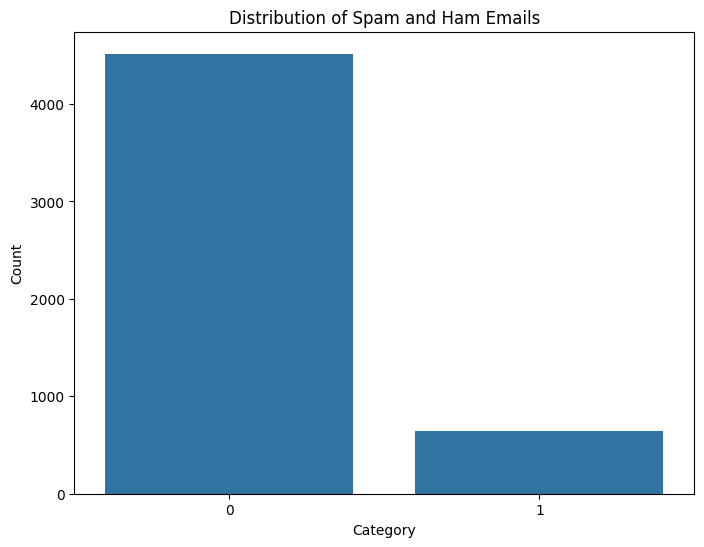

In [ ]:
# Plotting the distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=email_data)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


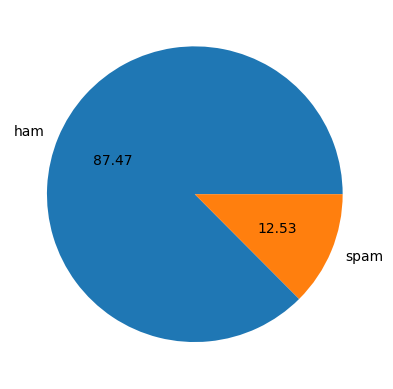

In [ ]:
plt.pie(email_data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1770 (\N{ARABIC EMPTY CENTRE LOW STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1772 (\N{ARABIC ROUNDED HIGH STOP WITH FILLED CENTRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


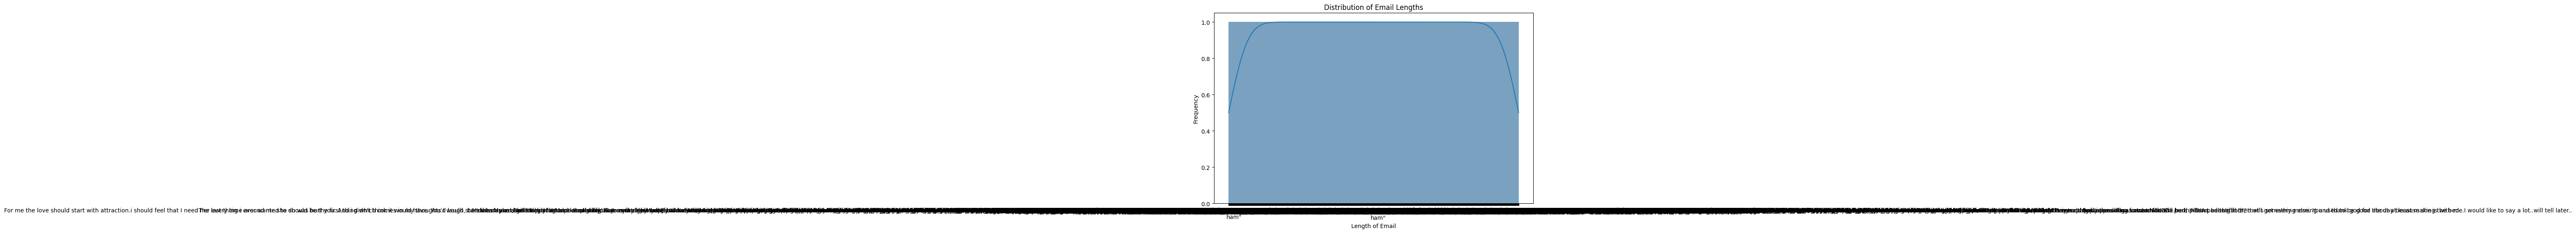

In [ ]:
# Plotting email length distribution
plt.figure(figsize=(10, 6))
sns.histplot(email_data['Message'], bins=50, kde=True)
plt.title('Distribution of Email Lengths')
plt.xlabel('Length of Email')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_txt(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_txt("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:

email_data['transformed_text'] = email_data['Message'].apply(transform_txt)

<ipython-input-71-042027e9af6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_data['transformed_text'] = email_data['Message'].apply(transform_txt)


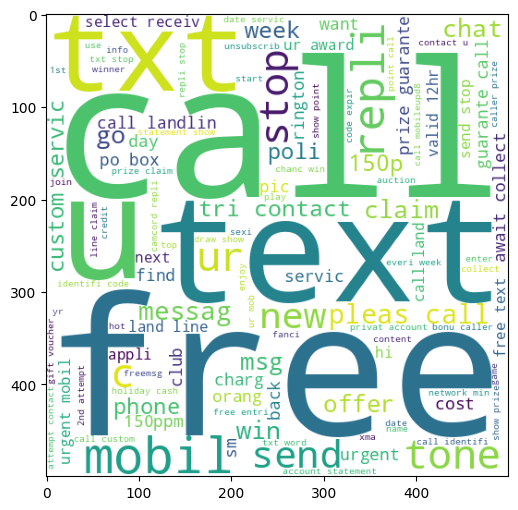

In [ ]:

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(email_data[email_data['Category'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(spam_wc)

In [ ]:
spam_corpus = []
for msg in email_data[email_data['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9861

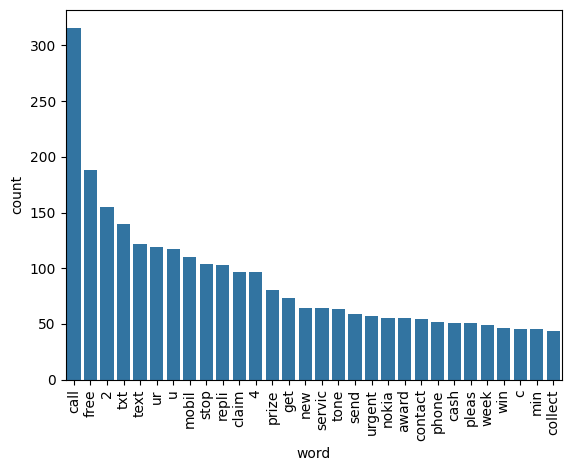

In [ ]:
from collections import Counter
most_common_words = Counter(spam_corpus).most_common(30)

df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in email_data[email_data['Category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35306

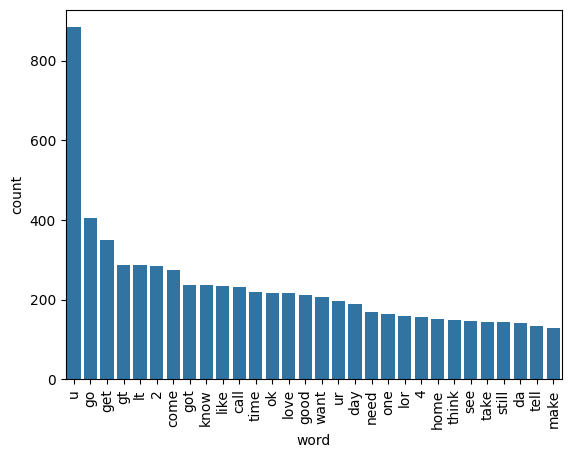

In [ ]:
most_common_words = Counter(ham_corpus).most_common(30)

df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

## BUILDING THE MODEL

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = tfidf.fit_transform(email_data['transformed_text']).toarray()

In [ ]:
y = email_data['Category'].values

In [ ]:
print(x.shape)
print(y.shape)

(5163, 3000)
(5163,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knnc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)

In [ ]:
clfs = {
    'SVC' : svcc,
    'KNN' : knnc,
    'DT': dtc,
    'LR': lrc,
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.978702807357212, 0.9805825242718447)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.978702807357212
Precision -  0.9805825242718447
For  KNN
Accuracy -  0.9225556631171346
Precision -  1.0
For  DT
Accuracy -  0.936108422071636
Precision -  0.8235294117647058
For  LR
Accuracy -  0.9554695062923524
Precision -  0.9310344827586207


In [ ]:
performance_df = pd.DataFrame({
    'Classifier': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)
print(performance_df)

  Classifier  Accuracy  Precision
1        KNN  0.922556   1.000000
0        SVC  0.978703   0.980583
3         LR  0.955470   0.931034
2         DT  0.936108   0.823529


In [ ]:
performance_df1 = pd.melt(performance_df,id_vars='Classifier')

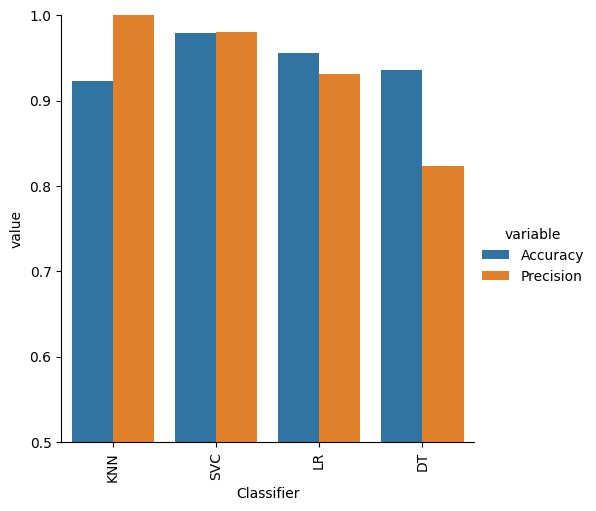

In [ ]:
sns.catplot(x = 'Classifier', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Step 1: Fit the Logistic Regression model on the entire training data
clf = svcc
clf.fit(x_train, y_train)
def preprocess_and_transform(texts):
    transform_text = [transform_txt(text) for text in texts]
    text_features = tfidf.transform(transform_text).toarray()

    return text_features

emails = [
    "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now.",
    "Hey, are we still on for the meeting tomorrow?",
    "Reminder: Your bill payment is due tomorrow.",
    "Win a brand new car! Enter the contest by clicking this link.",
    "Get rich quick! Invest now and earn double in a week.",
]

features= preprocess_and_transform(emails)

predicted= clf.predict(features)

predictions_labels = ['ham' if label == 0 else 'spam' for label in predicted]

for email, label in zip(emails, predictions_labels):
    print(f"Email: {email}\nPrediction: {label}\n")

Email: Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now.
Prediction: spam

Email: Hey, are we still on for the meeting tomorrow?
Prediction: ham

Email: Reminder: Your bill payment is due tomorrow.
Prediction: ham

Email: Win a brand new car! Enter the contest by clicking this link.
Prediction: spam

Email: Get rich quick! Invest now and earn double in a week.
Prediction: ham

